<style>
    .golden-alert {
        background-color: gold;
        font-weight: bold;
    }
    .golden-alert h1, 
    .golden-alert h3 {
        font-weight: bold;
    }
</style>

<div class="alert alert-block alert-info golden-alert">
    <h1 align="center">SKLearn Nearest Neighbor</h1>
    <h3 align="center"> Machine Learning Course</h3>
</div>

#### Load Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Set Hyperparameters

In [2]:
PATH_DATA = "../data/"

#### Load Data

In [3]:
bcancer = pd.read_csv(PATH_DATA + "breast_cancer.csv")
bcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bcancer.drop('Unnamed: 32',axis=1,  inplace=True)

In [5]:
bcancer.set_index(bcancer.id.name, inplace=True)

In [6]:
x = bcancer.drop(bcancer.diagnosis.name,axis=1)
y = bcancer.diagnosis
y = y.map({"M":0, "B":1})
print(x.shape)
print(y.shape)

(569, 30)
(569,)


#### Split Data into Test, Train, and Validation Sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101,shuffle=True)

In [8]:
print(x_test.shape)
print(y_test.shape)

(57, 30)
(57,)


#### Train the Model

In [9]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=10,max_depth=4,oob_score=True,random_state=101)

In [10]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=10, oob_score=True,
                       random_state=101)

#### Evaluate the Model

In [11]:
rf.oob_score_

0.955078125

In [12]:
rf.score(x_test, y_test)

0.9649122807017544

In [13]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        35

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



#### Interpret Features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25388\270851863.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


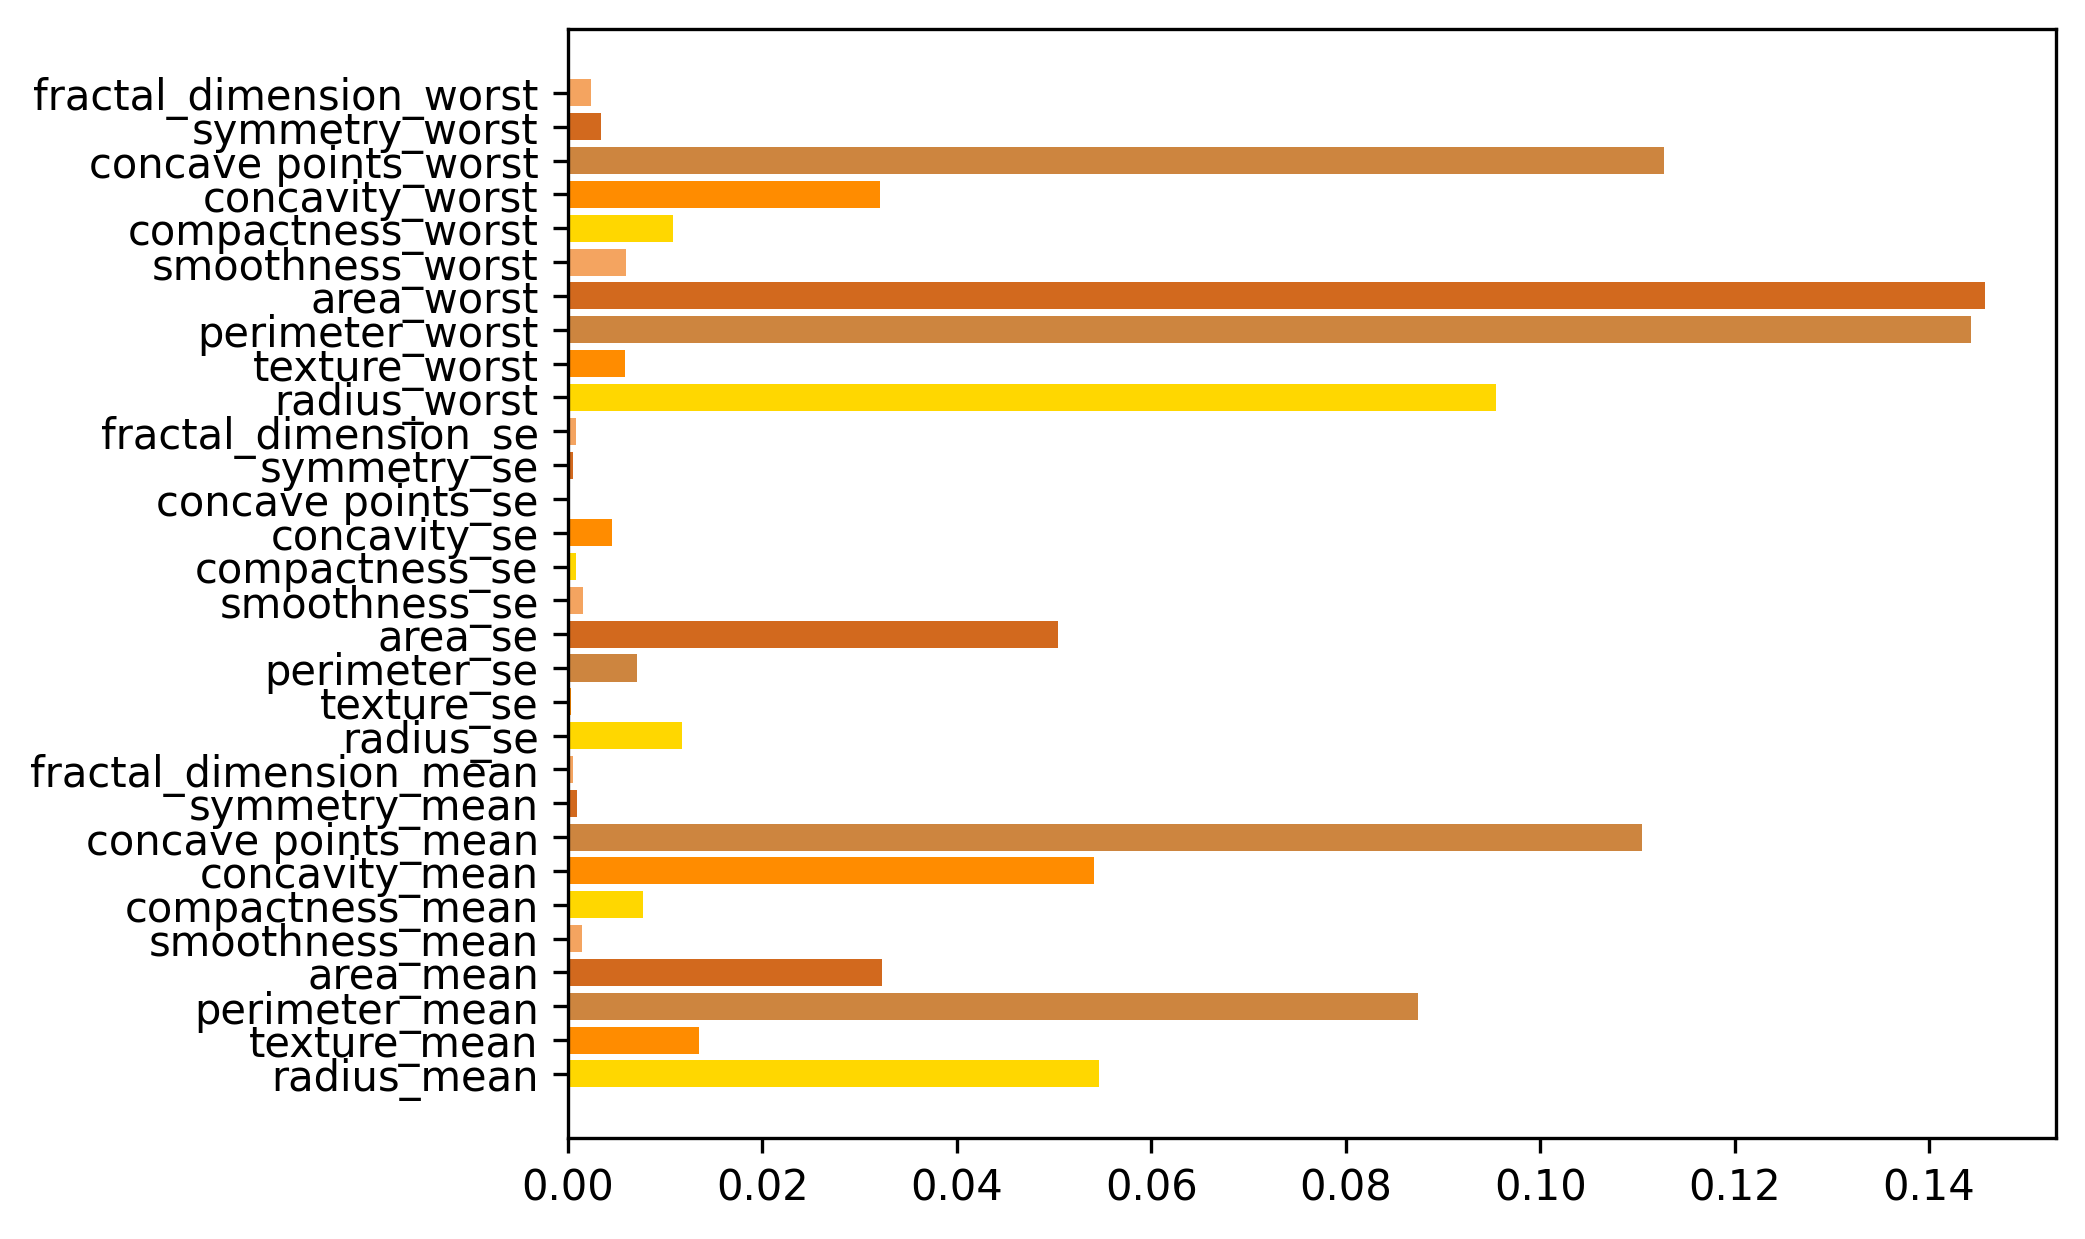

In [17]:
nfeatures = x.shape[1]
colors = ['gold', 'darkorange', 'peru', 'chocolate', 'sandybrown']  # رنگ‌های مختلف
fig, ax = plt.subplots(dpi=300)
ax.barh(range(nfeatures), rf.feature_importances_, color=colors)
ax.set_yticks(range(nfeatures))
ax.set_yticklabels(bcancer.columns.drop('diagnosis'))
fig.show()

#### Repeat Again with the Three Most Important Features

In [ ]:
fi = rf.feature_importances_.argsort()[-5:]

In [ ]:
x = x.iloc[:, fi]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101,shuffle=True)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(57, 5)
(57,)


In [ ]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=10,max_depth=4,oob_score=True,random_state=101)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=10, oob_score=True,
                       random_state=101)

In [ ]:
rf.oob_score_

0.9375

In [ ]:
rf.score(x_test, y_test)

0.9649122807017544

In [ ]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        35

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

